<h1><center>Clustering analysis Google Analytics, Full explained with GridSearch, Neural Networks, RandomForest and Logistic Regression models.

Pleas, any question, doubt or suggestion I will be happy to answer you.

# ***Objetive:***

We work as data scientists for a retail company that, due to the change in customer consumption habits, is widely promoting the online sales service. The company wants to run a machine learning model to rank customers based on the likelihood of generating revenue when shopping on the web.

The goal is to perform a series of specific actions for customers who are most likely to make purchases on the web.

In [1]:
#Import necesary libraries 
import pandas as pd # Basic tool for transform and clean Data. 
pd.options.display.max_columns = 100 # This option lets us see on the screen 100 columns of informatio
                                    # that is really usefull for a better visualitation of our data
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
import warnings
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import PowerTransformer, MinMaxScaler
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
warnings.filterwarnings('ignore')

In [2]:
XY = pd.read_csv('../input/online-shoppers-intention/online_shoppers_intention.csv')

In [3]:
print(u'- El número de filas en el dataset es: {}'.format(XY.shape[0]))
print(u'- El número de columnas en el dataset es: {}'.format(XY.shape[1]))
print(u'- Los nombres de las variables son: {}'.format(list(XY.columns)))
XY[:2]

- El número de filas en el dataset es: 12330
- El número de columnas en el dataset es: 18
- Los nombres de las variables son: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False


In [4]:
XY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
XY.describe(include = 'bool')

,Weekend,Revenue
count,12330,12330
unique,2,2
top,False,False
freq,9462,10422


At this point we coud see that we need a binary cluster Ml model to indetify what kind of user will buy in the online stores. So, we will start  
# <center> **Preprocessing Data**

In [6]:
#We just have few NAN in our dataset so we'll just delete them.  
XY.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [7]:
XY = XY.dropna()
XY.isnull().sum()
#Now we dont have nan.

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

## <center> Our next important step is analyze column by column, looking for stranger values

In [8]:
#Function for describe every column:

def describe_column(df, col):
    print(f'Columna: {col}  -  Tipo de datos: {df[col].dtype}')
    print(f'Número de valores nulos: {df[col].isnull().sum()}  -  Número de valores distintos: {df[col].nunique()}')
    print('Valores más frecuentes:')
    for i, v in df[col].value_counts().iloc[:20].items() :
        print(i, '\t', v)

In [9]:
describe_column(XY, 'Administrative')
#All looks good.

Columna: Administrative  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 27
Valores más frecuentes:
0 	 5768
1 	 1354
2 	 1114
3 	 915
4 	 765
5 	 575
6 	 432
7 	 338
8 	 287
9 	 225
10 	 153
11 	 105
12 	 86
13 	 56
14 	 44
15 	 38
16 	 24
17 	 16
18 	 12
19 	 6


In [10]:
describe_column(XY, 'Administrative_Duration')
# Since this columns tell us the time spent on certain type of page, a -1 value
# its a strange value, then we can infer that '-1' represent nan values also.  
# we will take a look.

Columna: Administrative_Duration  -  Tipo de datos: float64
Número de valores nulos: 0  -  Número de valores distintos: 3335
Valores más frecuentes:
0.0 	 5903
4.0 	 56
5.0 	 53
7.0 	 45
11.0 	 42
6.0 	 41
14.0 	 37
9.0 	 35
15.0 	 33
10.0 	 32
19.0 	 29
13.0 	 29
12.0 	 28
21.0 	 28
8.0 	 26
3.0 	 26
18.0 	 26
20.0 	 26
17.0 	 25
37.0 	 24


In [11]:
menos_1 = XY['Administrative_Duration'] == -1
menos_uno = XY[menos_1]

In [12]:
menos_uno.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue


All this '-1' looks like wrong values so we'll drop them. We can do it without problems, because there are just few values and looks like there are conected with other -1 values in the nexts columns.

In [13]:
XY = XY.drop(XY[XY['Administrative_Duration']==-1].index)

In [14]:
#Now our columns looks better. 
describe_column(XY, 'Administrative_Duration')

Columna: Administrative_Duration  -  Tipo de datos: float64
Número de valores nulos: 0  -  Número de valores distintos: 3335
Valores más frecuentes:
0.0 	 5903
4.0 	 56
5.0 	 53
7.0 	 45
11.0 	 42
6.0 	 41
14.0 	 37
9.0 	 35
15.0 	 33
10.0 	 32
19.0 	 29
13.0 	 29
12.0 	 28
21.0 	 28
8.0 	 26
3.0 	 26
18.0 	 26
20.0 	 26
17.0 	 25
37.0 	 24


In [15]:
describe_column(XY, 'Informational') #All perfect. Next one

Columna: Informational  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 17
Valores más frecuentes:
0 	 9699
1 	 1041
2 	 728
3 	 380
4 	 222
5 	 99
6 	 78
7 	 36
9 	 15
8 	 14
10 	 7
12 	 5
14 	 2
11 	 1
13 	 1
24 	 1
16 	 1


In [16]:
describe_column(XY, 'Informational_Duration') #All perfect. Next one

Columna: Informational_Duration  -  Tipo de datos: float64
Número de valores nulos: 0  -  Número de valores distintos: 1258
Valores más frecuentes:
0.0 	 9925
9.0 	 33
6.0 	 26
10.0 	 26
7.0 	 26
13.0 	 23
12.0 	 23
8.0 	 22
16.0 	 22
11.0 	 21
17.0 	 18
15.0 	 18
5.0 	 18
23.0 	 17
4.0 	 17
14.0 	 17
18.0 	 17
3.0 	 16
20.0 	 14
21.0 	 14


In [17]:
describe_column(XY, 'ProductRelated') #All perfect. Next one

Columna: ProductRelated  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 311
Valores más frecuentes:
1 	 622
2 	 465
3 	 458
4 	 404
6 	 396
7 	 391
5 	 382
8 	 370
10 	 330
9 	 317
12 	 313
11 	 308
13 	 289
15 	 270
16 	 260
14 	 251
17 	 226
20 	 225
19 	 218
22 	 213


In [18]:
describe_column(XY, 'ProductRelated_Duration') #All perfect. Next one

Columna: ProductRelated_Duration  -  Tipo de datos: float64
Número de valores nulos: 0  -  Número de valores distintos: 9551
Valores más frecuentes:
0.0 	 755
17.0 	 21
8.0 	 17
11.0 	 17
15.0 	 16
19.0 	 15
22.0 	 15
12.0 	 15
7.0 	 14
13.0 	 14
5.0 	 13
24.0 	 13
14.0 	 13
59.0 	 12
34.0 	 12
25.0 	 12
36.0 	 11
50.0 	 11
20.0 	 10
64.0 	 10


In [19]:
describe_column(XY, 'BounceRates') #All perfect. Next one

Columna: BounceRates  -  Tipo de datos: float64
Número de valores nulos: 0  -  Número de valores distintos: 1872
Valores más frecuentes:
0.0 	 5518
0.2 	 700
0.066666667 	 134
0.028571429 	 115
0.05 	 113
0.033333333 	 101
0.025 	 100
0.016666667 	 99
0.1 	 98
0.04 	 96
0.02 	 91
0.022222222000000003 	 88
0.0125 	 85
0.018181818 	 81
0.015384615 	 76
0.014285714 	 73
0.008333333 	 72
0.011111111000000002 	 62
0.01 	 61
0.013333333000000001 	 54


In [20]:
describe_column(XY, 'ExitRates') #All perfect. Next one

Columna: ExitRates  -  Tipo de datos: float64
Número de valores nulos: 0  -  Número de valores distintos: 4777
Valores más frecuentes:
0.2 	 710
0.1 	 338
0.05 	 329
0.033333333 	 291
0.066666667 	 267
0.025 	 224
0.04 	 214
0.016666667 	 181
0.02 	 167
0.022222222000000003 	 152
0.028571429 	 150
0.014285714 	 118
0.0125 	 112
0.011111111000000002 	 103
0.013333333000000001 	 87
0.018181818 	 87
0.015384615 	 83
0.008333333 	 78
0.0 	 76
0.01 	 70


In [21]:
describe_column(XY, 'PageValues') #All perfect. Next one

Columna: PageValues  -  Tipo de datos: float64
Número de valores nulos: 0  -  Número de valores distintos: 2704
Valores más frecuentes:
0.0 	 9600
53.988 	 6
42.29306752 	 3
40.27815244 	 2
12.55885714 	 2
44.89345937 	 2
58.9241766 	 2
16.158558199999998 	 2
10.99901844 	 2
21.2112655 	 2
26.5455 	 2
59.988 	 2
9.084767800000002 	 2
87.90296059999999 	 2
22.738000000000003 	 2
34.03997536 	 2
40.4014481 	 2
54.98 	 2
14.1273698 	 2
78.56959864 	 2


In [22]:
describe_column(XY, 'SpecialDay') #All perfect. Next one

Columna: SpecialDay  -  Tipo de datos: float64
Número de valores nulos: 0  -  Número de valores distintos: 6
Valores más frecuentes:
0.0 	 11079
0.6 	 351
0.8 	 325
0.4 	 243
0.2 	 178
1.0 	 154


In [23]:
describe_column(XY, 'Month') #We have two months left. 

Columna: Month  -  Tipo de datos: object
Número de valores nulos: 0  -  Número de valores distintos: 10
Valores más frecuentes:
May 	 3364
Nov 	 2998
Mar 	 1907
Dec 	 1727
Oct 	 549
Sep 	 448
Aug 	 433
Jul 	 432
June 	 288
Feb 	 184


In [24]:
describe_column(XY, 'OperatingSystems') #Ok

Columna: OperatingSystems  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 8
Valores más frecuentes:
2 	 6601
1 	 2585
3 	 2555
4 	 478
8 	 79
6 	 19
7 	 7
5 	 6


In [25]:
describe_column(XY, 'Browser') #Ok

Columna: Browser  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 13
Valores más frecuentes:
2 	 7961
1 	 2462
4 	 736
5 	 467
6 	 174
10 	 163
8 	 135
3 	 105
13 	 61
7 	 49
12 	 10
11 	 6
9 	 1


In [26]:
describe_column(XY, 'Region') #Ok

Columna: Region  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 9
Valores más frecuentes:
1 	 4780
3 	 2403
4 	 1182
2 	 1136
6 	 805
7 	 761
9 	 511
8 	 434
5 	 318


In [27]:
describe_column(XY, 'TrafficType') #Ok

Columna: TrafficType  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 20
Valores más frecuentes:
2 	 3913
1 	 2451
3 	 2052
4 	 1069
13 	 738
10 	 450
6 	 444
8 	 343
5 	 260
11 	 247
20 	 198
9 	 42
7 	 40
15 	 38
19 	 17
14 	 13
18 	 10
16 	 3
12 	 1
17 	 1


In [28]:
describe_column(XY, 'VisitorType') #This 'other' values looks suspicius. But ill keep
#them for the moment. 

Columna: VisitorType  -  Tipo de datos: object
Número de valores nulos: 0  -  Número de valores distintos: 3
Valores más frecuentes:
Returning_Visitor 	 10551
New_Visitor 	 1694
Other 	 85


In [29]:
describe_column(XY, 'Weekend')

Columna: Weekend  -  Tipo de datos: bool
Número de valores nulos: 0  -  Número de valores distintos: 2
Valores más frecuentes:
False 	 9462
True 	 2868


In [30]:
describe_column(XY, 'Revenue')

Columna: Revenue  -  Tipo de datos: bool
Número de valores nulos: 0  -  Número de valores distintos: 2
Valores más frecuentes:
False 	 10422
True 	 1908


### For graphs our variables, the first step is transform the categorical values to numeric.

In [31]:
# Transform the booleans object to numeric for our future ML or DL model and graphs
XY['Weekend'] = XY['Weekend'].map({False:0, True:1})
XY['Revenue'] = XY['Revenue'].map({False:0, True:1})

### For take a desicion about wich method we'll use, first we need to know how many variables have 'Month' and 'VisitorType' colums.

In [32]:
# 10 categories (Months)
XY.Month.unique() 

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [33]:
# Just 3 categories
XY.VisitorType.unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

### Since, we just have 13 categories, use the dummies functions its a good options for our dataframe. In case of have so much more categories values probably we should choose another option.
Mainly because the Dummies function adds X amount of columns to our dataframe based on how many categories our base columns have.

In [34]:
X_D = pd.get_dummies(XY,columns=['Month','VisitorType'],drop_first=True)
X_D[:3]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,2,2,1,2,0,0,0,1,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,4,1,9,3,0,0,0,1,0,0,0,0,0,0,0,0,1


In [35]:
X_numeric = XY.drop(columns=['Month', 'VisitorType', 'Revenue'])
# We create this DF witouth categories columns for plot

#### <center> We finish, now we'll separete our target Y from the features X 

In [36]:
X = X_D.drop('Revenue', axis=1)
y = X_D['Revenue']

## <center> GRAPHS

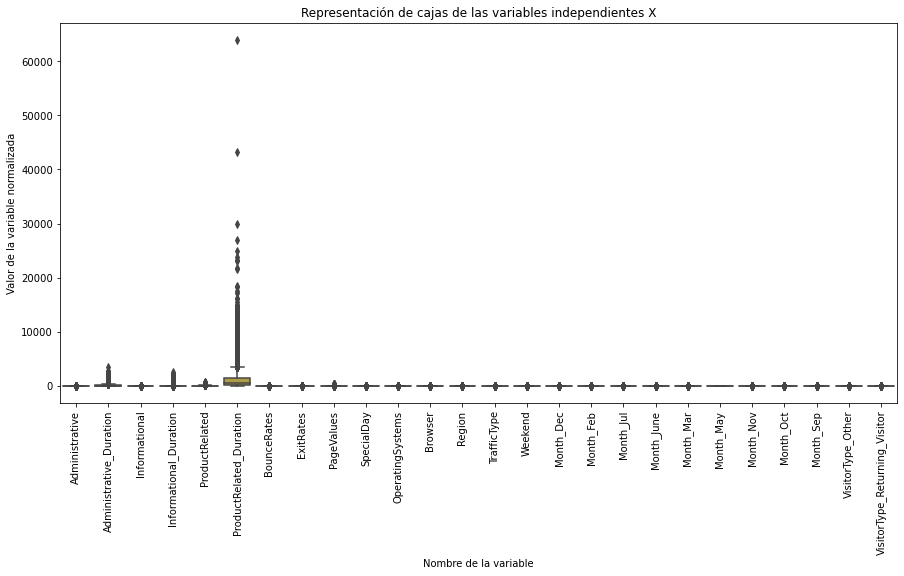

In [37]:
plt.figure(figsize=(15,7))
ax = sns.boxplot(data=X)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title(u'Representación de cajas de las variables independientes X')
plt.ylabel('Valor de la variable normalizada')
_ = plt.xlabel('Nombre de la variable')

All the variables are concentrated on the lower part of the graph, with the expeption of 'ProductRelated_Duration'. That is a really good reason for standarize the Data before to train our ML or DL model.

**its Important** also, that big outlier in 'ProductRelated_Duration', but taking in consideretion that this variable is the time spent inside of the specefic shoping page probably is not a wrong value. 

<center> <h1> Outlier

In [38]:
# Detect the outliers on ProductRelated_Duration, which, according to our graphs,
# was the only  column with possible outliers

q = X["ProductRelated_Duration"].quantile(0.99)

# and then filter with:

time_spent=X[X["ProductRelated_Duration"] > q]

In [39]:
time_spent_in_seconds = time_spent['ProductRelated_Duration'].mean()

In [40]:
time_spent_in_hours = time_spent_in_seconds/3600 # This columns its in seconds and here we transform it
# in hours for better analysis.

In [41]:
round(time_spent_in_hours, 2)

3.58

Here we coud see that the mean of spent time in the shop page for the 0.01 higher quantile of 'ProductRelated_Duration' columns is 3.59 hours. That looks really normal. 

¿Who hasnt spent 3 hours choosing the best product?

**The otliers will remain in our dataframe**

<center><h1> Graphs

In [42]:
# Functions that we'll use. Its not really necessary at this point that you understand every line of
# code.

def relaciones_vs_target(X, Y, return_type='axes'):
    '''
    Función que representa gráficos de dispersión de las variables
    en X en función a la variable Y
    '''
    fig_tot = (len(X_numeric.columns))
    fig_por_fila = 4.
    tamanio_fig = 4.
    num_filas = int( np.ceil(fig_tot/fig_por_fila) )    
    plt.figure( figsize=( fig_por_fila*tamanio_fig+5, num_filas*tamanio_fig+5 ) )
    c = 0 
    for i, col in enumerate(X.columns):
        plt.subplot(num_filas, fig_por_fila, i+1)
        sns.scatterplot(x=X_numeric[col], y=Y)
        plt.title( '%s vs %s' % (col, 'target') )
        plt.ylabel('Target')
        plt.xlabel(col)
    plt.show()

def represento_doble_hist(x_1, x_0, n_bins=11, title='', label_1='Clase 1', 
                          label_0='Clase 0', density=0):
    '''
    Función que recibe dos distribuciones de probabilidad y las representa
    en el mismo gráfico
    '''
    bins = n_bins
    plt.hist(x_1, bins, density = density, alpha=0.5, label=label_1, color='red')    
    plt.hist(x_0, bins, density = density, alpha=0.5, label=label_0, color='green')
    plt.title(title)
    plt.legend(loc='best') 

def hist_pos_neg_feat(x, y, density=0, nbins=11, targets=(0,1)):
    '''
    Representa las variables en x divididas en dos distribuciones
    según su valor de y sea 1 o 0
    '''
    fig_tot = len(x.columns)
    fig_tot_fila = 3.; fig_tamanio = 5.
    num_filas = int( np.ceil(fig_tot/fig_tot_fila) )
    plt.figure( figsize=( fig_tot_fila*fig_tamanio+2, num_filas*fig_tamanio+2 ) )
    target_neg, target_pos = targets
    for i, feat in enumerate(x.columns):
        plt.subplot(num_filas, fig_tot_fila, i+1);
        plt.title('%s' % feat)
        idx_pos = y == target_pos
        idx_neg= y == target_neg
        represento_doble_hist(x[feat][idx_pos].values, x[feat][idx_neg].values, nbins, 
                   density = density, title=('%s' % feat))

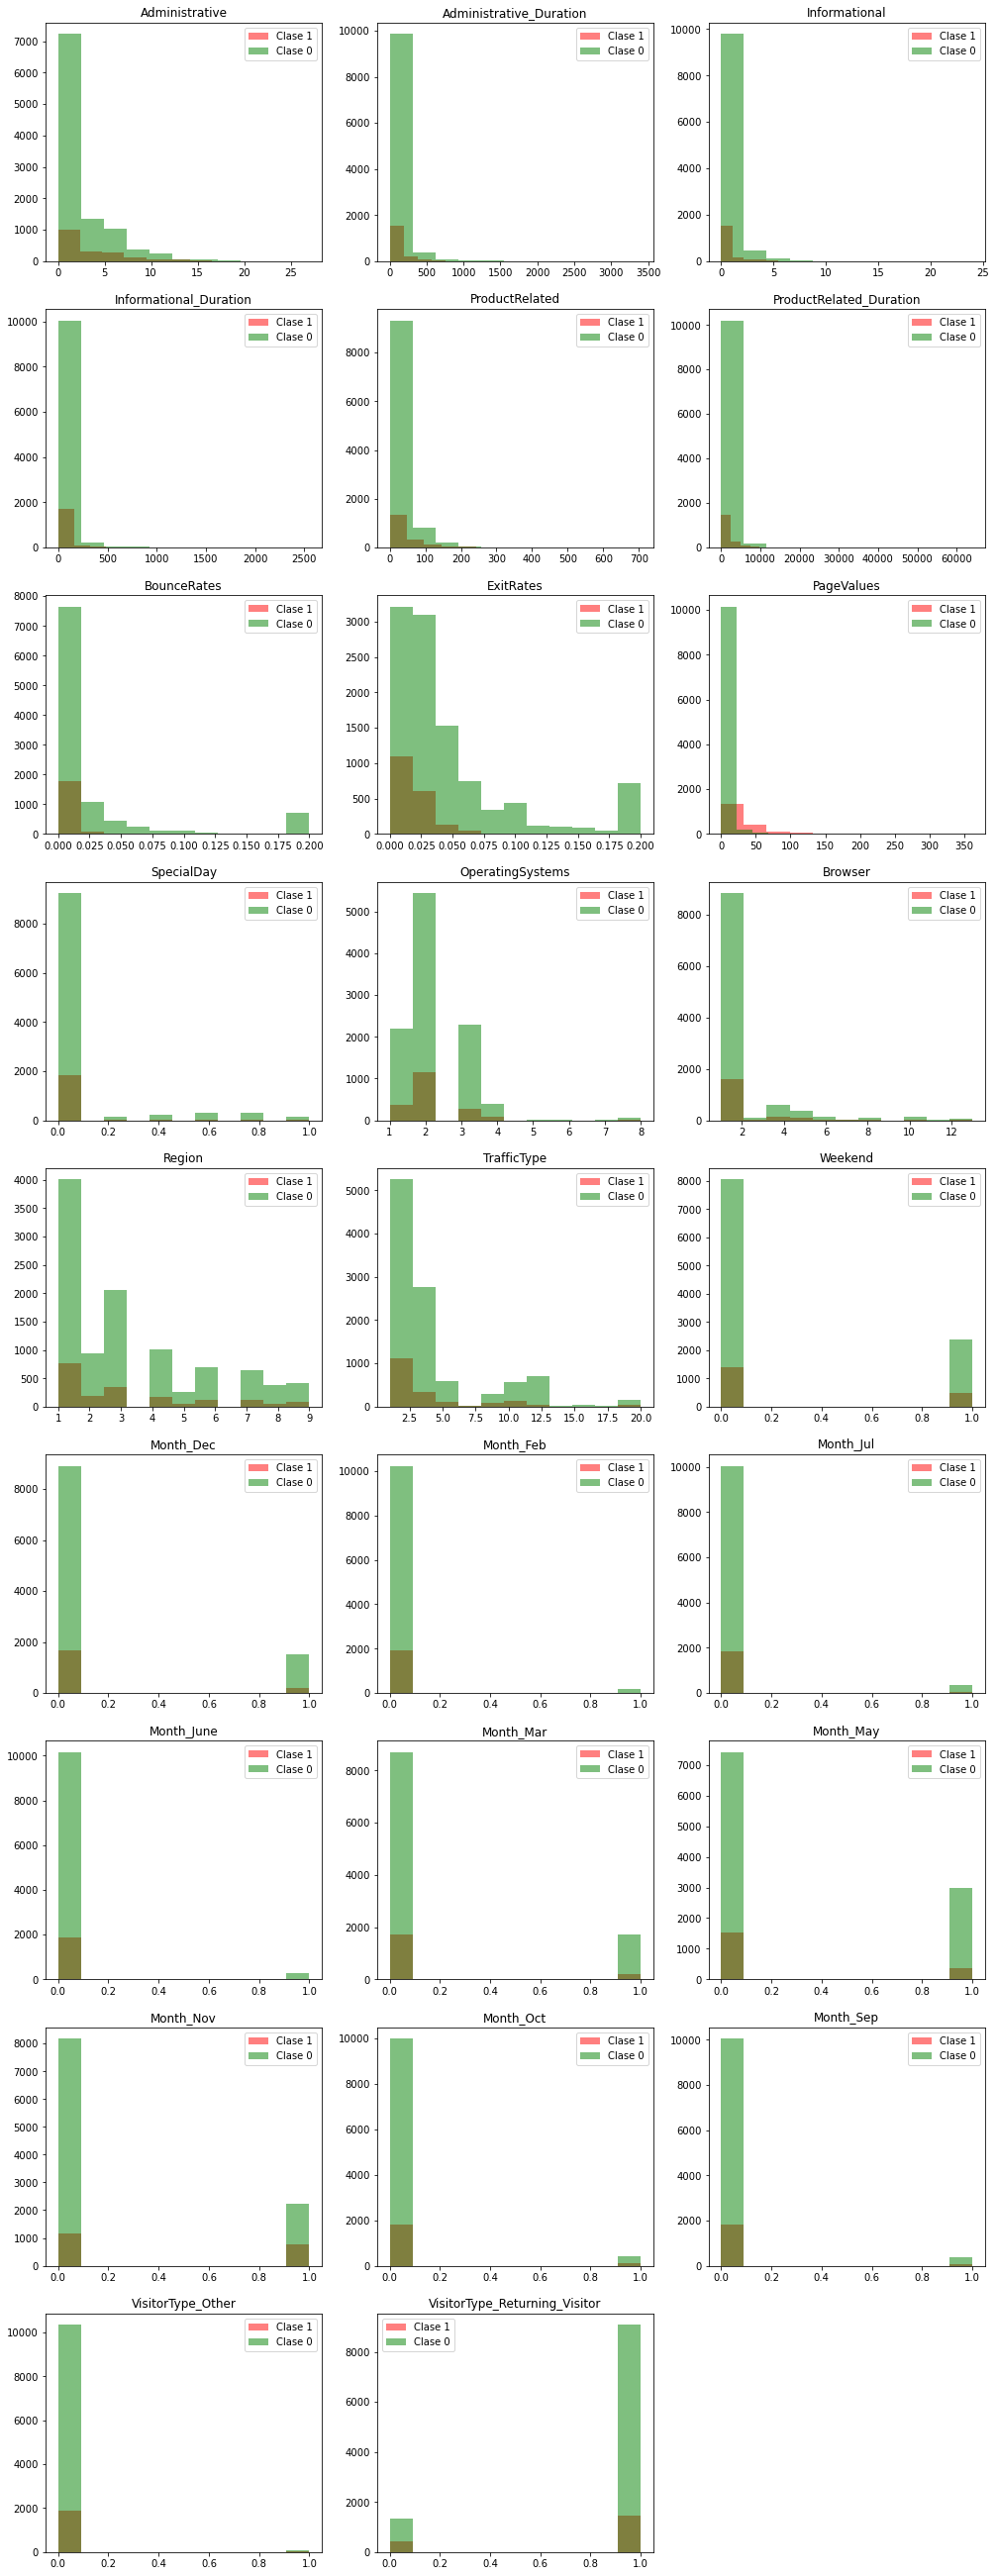

In [43]:
hist_pos_neg_feat(X,y)

According to these graphs, we can see that customers who complete online purchases are evenly distributed within our data. Only with a visual analysis can not obtain new value data to contribute to the Marketing department.

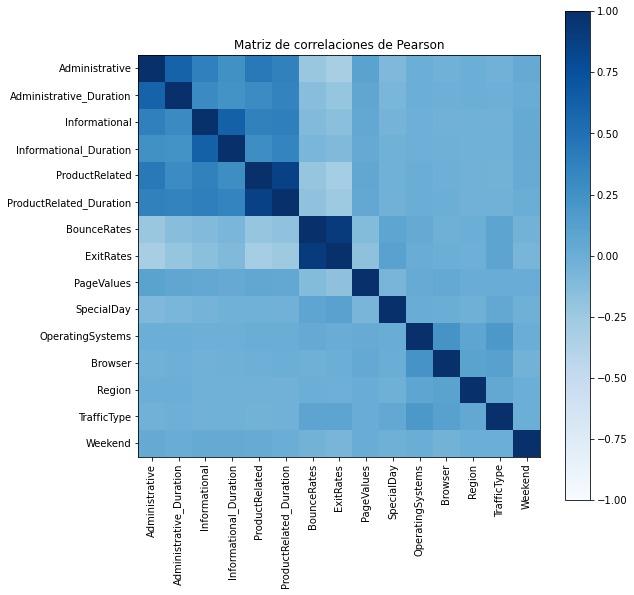

In [44]:
matriz_correlaciones = X_numeric.corr(method='pearson')
n_ticks = len(X_numeric.columns)
plt.figure( figsize=(9, 9) )
plt.xticks(range(n_ticks), X_numeric.columns, rotation='vertical')
plt.yticks(range(n_ticks), X_numeric.columns)
plt.colorbar(plt.imshow(matriz_correlaciones, interpolation='nearest', 
                            vmin=-1., vmax=1., 
                            cmap=plt.get_cmap('Blues')))
_ = plt.title('Matriz de correlaciones de Pearson')

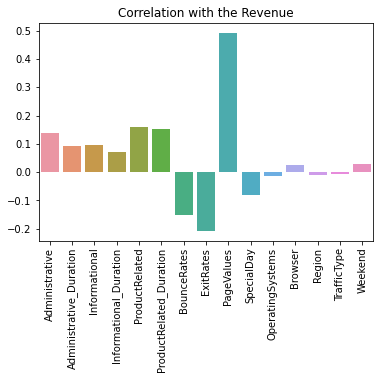

In [45]:
# Correlation with Revenue
data_corr = XY.corr()['Revenue'] 
sns.barplot(data_corr[0:-1].index,data_corr[0:-1].values).set_title('Correlation with the Revenue')
plt.xticks(rotation = 90)
plt.show()

###  Resultantly, Page Values has the highest correlation( around 0.5) with Revenue compare to all other features.

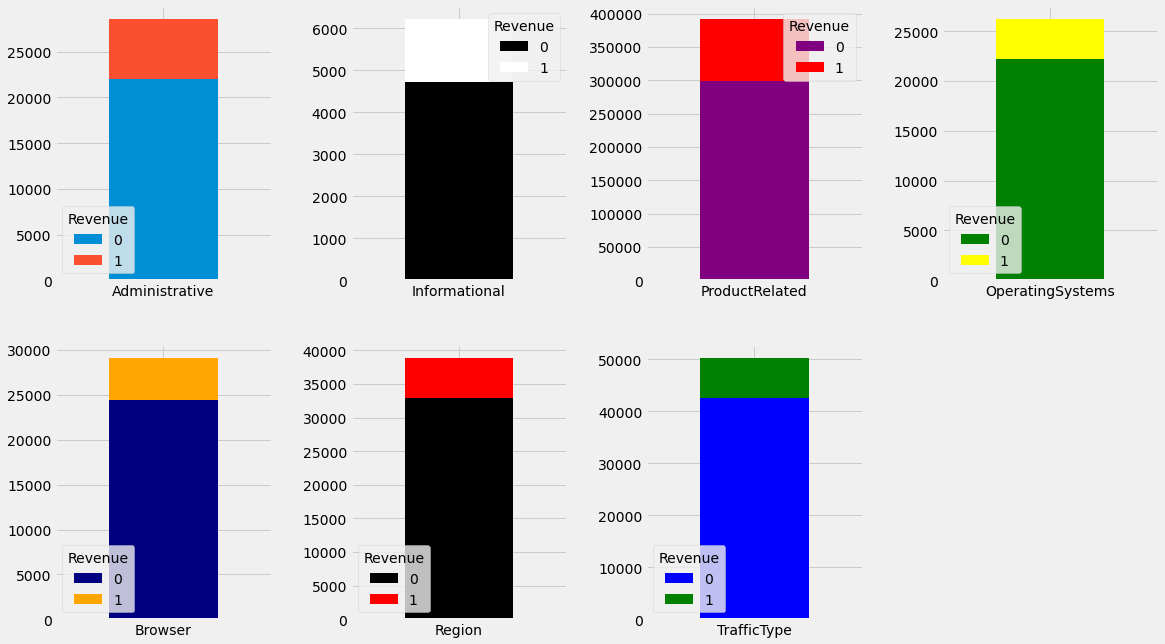

In [46]:
# Lets see the Ratio of Revenue in each types

plt.style.use('fivethirtyeight')
fig,ax = plt.subplots(nrows = 2, ncols = 4,figsize = (17,10))
fig.tight_layout(pad = 3)


adm_rev = XY[['Administrative','Revenue']]
rev_p1 = pd.DataFrame(XY.groupby('Revenue')['Administrative'].sum()).T
rev_p1.plot.bar(stacked=True,ax=ax[0,0])
ax[0,0].set_xticklabels(['Administrative'], rotation=360)
plt.legend(loc='best')


info_rev = XY[['Informational','Revenue']]
rev_p2 = pd.DataFrame(XY.groupby('Revenue')['Informational'].sum()).T
rev_p2.plot.bar(stacked=True,ax = ax[0,1],color = ['black','white'])
ax[0,1].set_xticklabels(['Informational'], rotation=360)
plt.legend(loc='best')

info_rev = XY[['ProductRelated','Revenue']]
rev_p2 = pd.DataFrame(XY.groupby('Revenue')['ProductRelated'].sum()).T
rev_p2.plot.bar(stacked=True,ax = ax[0,2],color = ['purple','red'])
ax[0,2].set_xticklabels(['ProductRelated'], rotation=360)
plt.legend(loc='best')



info_rev = XY[['OperatingSystems','Revenue']]
rev_p2 = pd.DataFrame(XY.groupby('Revenue')['OperatingSystems'].sum()).T
rev_p2.plot.bar(stacked=True,ax = ax[0,3],color = ['green','yellow'])
ax[0,3].set_xticklabels(['OperatingSystems'], rotation=360)


info_rev = XY[['Browser','Revenue']]
rev_p2 = pd.DataFrame(XY.groupby('Revenue')['Browser'].sum()).T
rev_p2.plot.bar(stacked=True,ax = ax[1,0],color = ['navy','orange'])
ax[1,0].set_xticklabels(['Browser'], rotation=360)


info_rev = XY[['Region','Revenue']]
rev_p2 = pd.DataFrame(XY.groupby('Revenue')['Region'].sum()).T
rev_p2.plot.bar(stacked=True,ax = ax[1,1],color = ['black','red'])
ax[1,1].set_xticklabels(['Region'], rotation=360)


info_rev = XY[['TrafficType','Revenue']]
rev_p2 = pd.DataFrame(XY.groupby('Revenue')['TrafficType'].sum()).T
rev_p2.plot.bar(stacked=True,ax = ax[1,2],color = ['blue','green'])
ax[1,2].set_xticklabels(['TrafficType'], rotation=360)

fig.delaxes(ax[1,3])

Columns :'Administrative', 'Informational' and 'ProductRelated' there are the most related with the revenue results. We have to keept that in mind. 

In [47]:
#All perfect. Continue. 

<center><h1> Standardization of data:

In [48]:
obj_escalar = StandardScaler()
X_estandarizado = obj_escalar.fit_transform(X_D)
#Al estandarizar los datos mi regresion logistica me entraga un ROC de 1.

In [49]:
X_estandarizado

array([[-0.69699296, -0.4571914 , -0.3964779 , ..., -0.19417541,
        -0.08331632,  0.41062101],
       [-0.69699296, -0.4571914 , -0.3964779 , ..., -0.19417541,
        -0.08331632,  0.41062101],
       [-0.69699296, -0.4571914 , -0.3964779 , ..., -0.19417541,
        -0.08331632,  0.41062101],
       ...,
       [-0.69699296, -0.4571914 , -0.3964779 , ..., -0.19417541,
        -0.08331632,  0.41062101],
       [ 0.50722805, -0.03291592, -0.3964779 , ..., -0.19417541,
        -0.08331632,  0.41062101],
       [-0.69699296, -0.4571914 , -0.3964779 , ..., -0.19417541,
        -0.08331632, -2.43533571]])

In [50]:
# Now, we divide our df in train and test for start applyng models

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


<center><H3> Now, We'll train 3 differents ML model looking for the best one 

<center><H2> Logistic Regresion

GridSearchCV its a extremly useful code for ours ML model. Its lets us find the best combination of parameters. We shoud use it always

In [52]:
modelo1 = LogisticRegression()
parametros = {"C": [0.001, 0.008, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06], 
              "class_weight":['balanced', None]}

In [53]:
modelo_gs = GridSearchCV(modelo1, param_grid=parametros,
                         cv = 5, scoring='roc_auc')
modelo_gs.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.008, 0.01, 0.02, 0.03, 0.04, 0.05,
                               0.06],
                         'class_weight': ['balanced', None]},
             scoring='roc_auc')

In [54]:
print(modelo_gs.best_params_, "\nROC AUC: {}".format(round(modelo_gs.best_score_,2)))

{'C': 0.02, 'class_weight': 'balanced'} 
ROC AUC: 0.88


0.88 ROC AUC its a really nice result. But we must continue looking for other models. 
Important that in the code cell above, 'best_params_ give us the result of the best parameters for use finally in our model for this Dataset

In [55]:
df_search = pd.DataFrame.from_dict(modelo_gs.cv_results_)

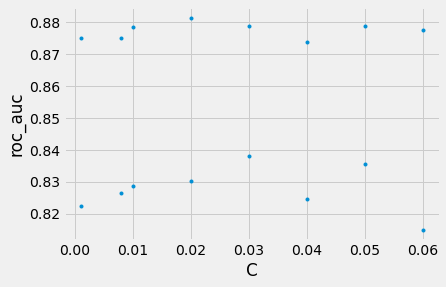

In [56]:
plt.xlabel('C')
plt.ylabel('roc_auc')
_ = plt.plot( df_search['param_C'], df_search['mean_test_score'], '.')

Analizando el modelo con el mejor alpha
En este paso nos quedamos con los mejores parámetros obtenidos en el paso anterior:

In [57]:
reg_log =  LogisticRegression(C=modelo_gs.best_params_['C'],
                              class_weight=modelo_gs.best_params_['class_weight'])

Finally we train our model with the best parameters that GridSearch give us.

In [58]:
reg_log.fit(X_train, Y_train)

LogisticRegression(C=0.02, class_weight='balanced')

Here, is when the Test Set comes into play. When you want to validate an already chosen and optimized model.
With that model optimized, I predict tests to see how it behaves on data that you haven't seen before

In [59]:
y_test_pred_prob = reg_log.predict_proba(X_test)
y_test_pred_prob_pos = y_test_pred_prob[np.where(Y_test == 1)[0]]
y_test_pred_prob_neg = y_test_pred_prob[np.where(Y_test == 0)[0]]

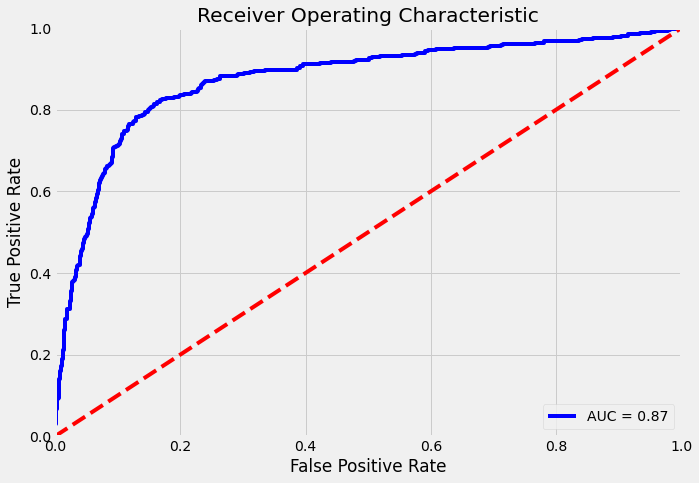

In [60]:
preds = y_test_pred_prob[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(10,7))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

This figure represents in green the probabilities assigned by the model to data that are 0s (the closer the green distribution is to 0, the better) and in red the probabilities assigned to the data that are 1s (the closer the red distribution is to 1 best).

Esta figura representa en verde las probabilidades que asigna el modelo a los datos que son 0s (cuanto más cerca de 0 la distribución verde mejor) y en rojo las probabilidades asignadas a los datos que son 1s (cuanto más cerca esté de 1 la distribución roja mejor).

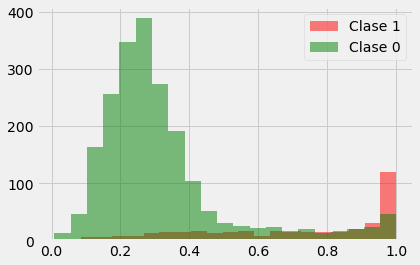

In [61]:
represento_doble_hist(y_test_pred_prob_pos[:, 1], y_test_pred_prob_neg[:, 1], n_bins=21, density=0)

We have to choose the umbral for separate our results which are continuous values into a binary option of Yes or Not (1 or 0) about the revenue probability.

In [62]:
umbral = 0.6
y_umbralizadas = 1*(y_test_pred_prob[:, 1] > umbral)

In [63]:
print(u"Matriz de confusión\n", metrics.confusion_matrix(Y_test, y_umbralizadas))
print("\nAccuracy\t{}".format(round(metrics.accuracy_score(Y_test, y_umbralizadas),2)))  
print("Sensitividad\t{}".format(round(metrics.recall_score(Y_test, y_umbralizadas),2)))
print(u"Precisión\t{}".format(round(metrics.precision_score(Y_test, y_umbralizadas),2)))    

Matriz de confusión
 [[1899  183]
 [ 128  256]]

Accuracy	0.87
Sensitividad	0.67
Precisión	0.58


In [64]:
umbral = 0.7
y_umbralizadas = 1*(y_test_pred_prob[:, 1] > umbral)

In [65]:
print(u"Matriz de confusión\n", metrics.confusion_matrix(Y_test, y_umbralizadas))
print("\nAccuracy\t{}".format(round(metrics.accuracy_score(Y_test, y_umbralizadas),2)))  
print("Sensitividad\t{}".format(round(metrics.recall_score(Y_test, y_umbralizadas),2)))
print(u"Precisión\t{}".format(round(metrics.precision_score(Y_test, y_umbralizadas),2)))    

Matriz de confusión
 [[1940  142]
 [ 156  228]]

Accuracy	0.88
Sensitividad	0.59
Precisión	0.62


We finally keep in 0.7 the threshold because it give us best performance. 

<center><h1> Neural Network Clasification

In [66]:
modelo = MLPClassifier()
parametros = {'solver': ['lbfgs'], 
              'max_iter': [300,500, 800, 1000], # Iteraciones máximas en cada red
              'alpha': 10.0 ** -np.arange(0.5, 2), # Parámetro de regularización L2 para evitar sobreajuste
              'hidden_layer_sizes':np.arange(10, 35), # Número de neuronas en cada capa
              'random_state':[0]}

In [67]:
modelo_gs2 = GridSearchCV(modelo, param_grid=parametros, cv = 3, 
                         scoring='roc_auc', n_jobs=-1, verbose=10)
modelo_gs2.fit(X_train, Y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   24.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   33.0s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   42.5s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   52.2s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  2

GridSearchCV(cv=3, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'alpha': array([0.31622777, 0.03162278]),
                         'hidden_layer_sizes': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34]),
                         'max_iter': [300, 500, 800, 1000], 'random_state': [0],
                         'solver': ['lbfgs']},
             scoring='roc_auc', verbose=10)

In [68]:
#In this case for GridSearch the Max Iter was 500, and we obtein the result that this param was the
#Best, so now ill adjust GridSearch for testing with Higher Max Iter and looks if our model improve.
print(modelo_gs2.best_params_, "\nROC AUC: {}".format(round(modelo_gs2.best_score_,2)))

{'alpha': 0.31622776601683794, 'hidden_layer_sizes': 18, 'max_iter': 1000, 'random_state': 0, 'solver': 'lbfgs'} 
ROC AUC: 0.9


In [69]:
#How we coud see, the ROC AUC improve using the max Iter again that i gave. First ill check with the
# test DF for look if we also get the same improve or in the worst case we get and overfit. 
print(modelo_gs2.best_params_, "\nROC AUC: {}".format(round(modelo_gs2.best_score_,2)))

{'alpha': 0.31622776601683794, 'hidden_layer_sizes': 18, 'max_iter': 1000, 'random_state': 0, 'solver': 'lbfgs'} 
ROC AUC: 0.9


## Best parameters

As in the other models, we obtain the best parameters found and fit a model with those parameters:

In [70]:
mejor_modelo = MLPClassifier(**modelo_gs2.best_params_, verbose=10)

In [71]:
mejor_modelo.fit(X_train, Y_train)

MLPClassifier(alpha=0.31622776601683794, hidden_layer_sizes=18, max_iter=1000,
              random_state=0, solver='lbfgs', verbose=10)

In [72]:
y_test_pred_prob = mejor_modelo.predict_proba(X_test) 
y_test_pred_prob_pos = y_test_pred_prob[np.where(Y_test == 1)[0]]
y_test_pred_prob_neg = y_test_pred_prob[np.where(Y_test == 0)[0]]

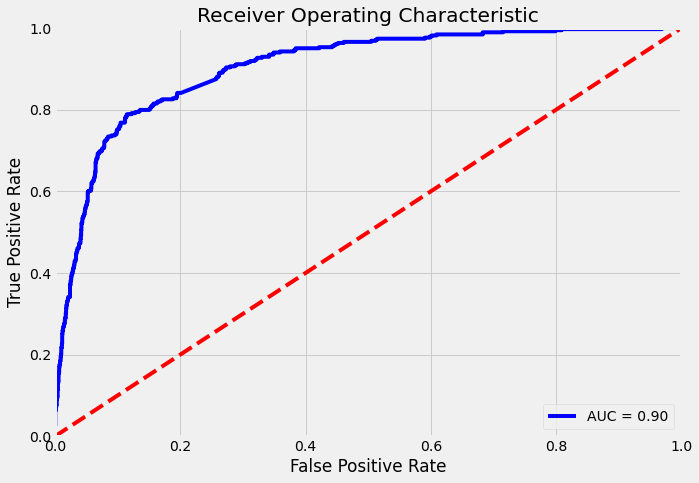

In [73]:
preds = y_test_pred_prob[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(10,7))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

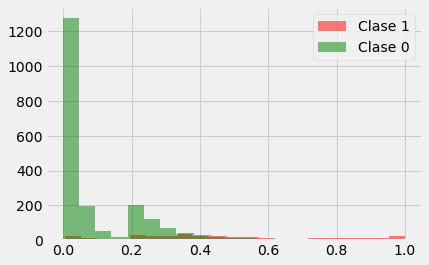

In [74]:
represento_doble_hist(y_test_pred_prob_pos[:, 1], y_test_pred_prob_neg[:, 1], n_bins=21, density=0)

In [75]:
umbral = 0.5
y_umbralizadas = 1*(y_test_pred_prob[:, 1] > umbral)

In [76]:
print(u"Matriz de confusión\n", metrics.confusion_matrix(Y_test, y_umbralizadas))
print("\nAccuracy\t{}".format(round(metrics.accuracy_score(Y_test, y_umbralizadas),2)))  
print("Sensitividad\t{}".format(round(metrics.recall_score(Y_test, y_umbralizadas),2)))
print(u"Precisión\t{}".format(round(metrics.precision_score(Y_test, y_umbralizadas),2)))  

Matriz de confusión
 [[2019   63]
 [ 225  159]]

Accuracy	0.88
Sensitividad	0.41
Precisión	0.72


In [77]:
# Modifing the Maxiter from 500 to 1000, improve the model but only on the train df. it keept
# 0.88 accurary. Probably we coud tried with a higher number of itermax.

<center><h1> RandomForestClassifier

In [78]:
rfclf = RandomForestClassifier(n_estimators = 30,max_depth = 10,random_state = 101)


rfclf.fit(X_train,Y_train)
pred = rfclf.predict(X_test)
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      2082
           1       0.73      0.61      0.67       384

    accuracy                           0.90      2466
   macro avg       0.83      0.79      0.81      2466
weighted avg       0.90      0.90      0.90      2466



In [79]:
# Lets Optimize the Random Forest Classifier using GridSearch
param_grid = {
    'n_estimators' : [80,100],
    'max_depth' : [10,15],
    'min_samples_leaf' : [2,3],
    'min_samples_split': [2,4]
}

gridsearch = GridSearchCV(estimator=rfclf,param_grid=param_grid,verbose = 1)
gridsearch.fit(X_train,Y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.4min finished


GridSearchCV(estimator=RandomForestClassifier(max_depth=10, n_estimators=30,
                                              random_state=101),
             param_grid={'max_depth': [10, 15], 'min_samples_leaf': [2, 3],
                         'min_samples_split': [2, 4],
                         'n_estimators': [80, 100]},
             verbose=1)

In [80]:
gridsearch.best_params_

{'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 100}

In [81]:
rfclf = RandomForestClassifier(n_estimators = 100,max_depth = 10,min_samples_leaf = 3, min_samples_split = 2,random_state = 101)
rfclf.fit(X_train,Y_train)
pred = rfclf.predict(X_test)
print(classification_report(Y_test,pred))

# 0 is False, 1 is True, the precision of detecting True has increased
from sklearn.metrics import accuracy_score
rfacc = accuracy_score(Y_test,pred)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      2082
           1       0.73      0.61      0.67       384

    accuracy                           0.91      2466
   macro avg       0.83      0.79      0.81      2466
weighted avg       0.90      0.91      0.90      2466



Finally we have developed the 3 ML models to predict whether a visitor to the e-commerce page will make a purchase or not. But as far as we have seen so far we have the big problem that these results are not easily transformed into value for the marketing department or someone else within the company.

This is due to the "Black Box" characteristic of the vast majority of the models used, which translates into not being able to extract important insights from the application of Machine Learning models.

It is because of the above that the "Permutation Importance" technique will finally be used to determine which of all our features are the ones that provide the closest approximation to determining whether the purchase will be made or not.

-----------

Finalmente hemos desarrollado los 3 modelos de ML para predecir si un visitante a la pagina de comercio electrónico realizara una compra o no. Pero hasta donde hemos visto hasta ahora nos surge el gran problema de que estos resultados no son facilmente transformables en valor para el departamento de marketing o algun otro dentro de la compañia. 

Esto es debido a la caracteristica de "Caja Negra" de la gran mayoria de los modelos utilizados, lo que se traduce en no poder extraer importantes insigths desde la aplicacion de modelos de Machine Learning.

Es en razon a lo anterior que se utilziara finalmente la tecnica de "Permutation Importance" para determinar cual de todas nuestras features son las que entregan mayor aproximacion a determinar si se realizará la compra o no. 

<h1><center> "Permutation Importance"

### Looking for the explanation of ours models. 

In [82]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rfclf, random_state=1).fit(X_test, Y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.1371 ± 0.0066,PageValues
0.0079 ± 0.0049,ExitRates
0.0068 ± 0.0025,Month_Nov
0.0052 ± 0.0041,BounceRates
0.0015 ± 0.0022,ProductRelated_Duration
0.0011 ± 0.0022,Informational_Duration
0.0007 ± 0.0033,Administrative
0.0005 ± 0.0024,ProductRelated
0.0002 ± 0.0006,Browser
0.0002 ± 0.0021,Month_Dec


<center><h1> Shap method

We see the same results again regarding which features are more important
____
Volvemos a ver los mismo resultados respecto a que featurees son mas importantes

From this application of 'PermutationImportance' to two of our models 'PageValues' appears to us as the main feature of importance when defining who will or will not make the purchase. Faced with this, our next step, in order to generate insights and transform our analysis into money for the company, is to thoroughly analyze that column and how it behaves.
This could only be done by means of very detailed and advanced statistical graphics, which is not objective in this work, but it is undoubtedly what would make the difference between a successful case or just one more Machine Learning model.
___
Desde esta aplicacion de 'PermutationImportance' a dos de nuestros modelos 'PageValues' nos aparece como la principal feature de importancia al momento de definir quien realizará o no la compra. Frente a esto nuestro siguiente paso, de vista a generar insights y tranformar nuestro analisis en dinero para la empresa es analisar a fondo aquella columna y como se comporta. 
Esto solo se podria realizar mediantes graficas estadisticas muy detalladas y avanzadas, lo cual no es objetivo en el presente trabajo, pero sin duda es lo que marcaría la diferencia entre un caso de exito o solo un modelo más de Machine Learning.

<center><h1> Manual Insigths
   

In [83]:
compradores_si = XY['Revenue'] == 1
compradores = XY[compradores_si]

In [84]:
compradores_no = XY['Revenue'] == 0
no_compradores = XY[compradores_no]

In [85]:
for i,k in zip(compradores.mean(),no_compradores.mean()):
    print (i,k)

3.393605870020964 2.1177317213586644
119.4832438943118 73.74011116864952
0.7861635220125787 0.45183266167722125
57.61142665093659 30.23623722882732
48.2101677148847 28.71464210324314
1876.2096148889023 1069.987809154446
0.005117152640461212 0.025317232197850356
0.019555168256813433 0.04737827052648154
27.264518194696002 1.9759977673701754
0.02316561844863732 0.0684321627326809
2.092767295597484 2.1297255805027824
2.45335429769392 2.339474189215122
3.0822851153039834 3.1592784494338897
4.021488469601677 4.078391863365956
0.26153039832285113 0.22730761849932835
1.0 0.0


In [86]:
print(compradores.mean(), ), print(no_compradores.mean())

Administrative                3.393606
Administrative_Duration     119.483244
Informational                 0.786164
Informational_Duration       57.611427
ProductRelated               48.210168
ProductRelated_Duration    1876.209615
BounceRates                   0.005117
ExitRates                     0.019555
PageValues                   27.264518
SpecialDay                    0.023166
OperatingSystems              2.092767
Browser                       2.453354
Region                        3.082285
TrafficType                   4.021488
Weekend                       0.261530
Revenue                       1.000000
dtype: float64
Administrative                2.117732
Administrative_Duration      73.740111
Informational                 0.451833
Informational_Duration       30.236237
ProductRelated               28.714642
ProductRelated_Duration    1069.987809
BounceRates                   0.025317
ExitRates                     0.047378
PageValues                    1.975998
SpecialDay

(None, None)

<center><h1> Conclusion

From my analysis, customers who are interested on buying the products :
Tend to stay longer on the website especially when they are on the website which is productrelated. Less likely to bounce or exit

All of the aforementioned would not charge an important value for the company if this model is not put into production in the cloud to analyze the data of potential buyers in real time and in this way direct marketing strategies to all those people who they are more likely to make a purchase.
___
Finalmente, como todo lo obtenido mediante el presente analisis, se puede corroborar las caracteristicas principales de los compradores quienes en promedio gastan mas tiempo visitando las paginas web, como tambien el numero de veces que las visitan, al mismo tiempo que los promedios de BounceRate y ExitRates son menores para estos grupos.

Todo lo anteriomente expuesto no cobraría un valor importante para la compañia si es que este modelo no se pone en produccion en la nube para analizar en tiempo real los datos de los posibles compradores y de esta forma direccionar las estrategias de marketing a todos aquellas personas que se encuentran mas propensas a realizar una compra. 

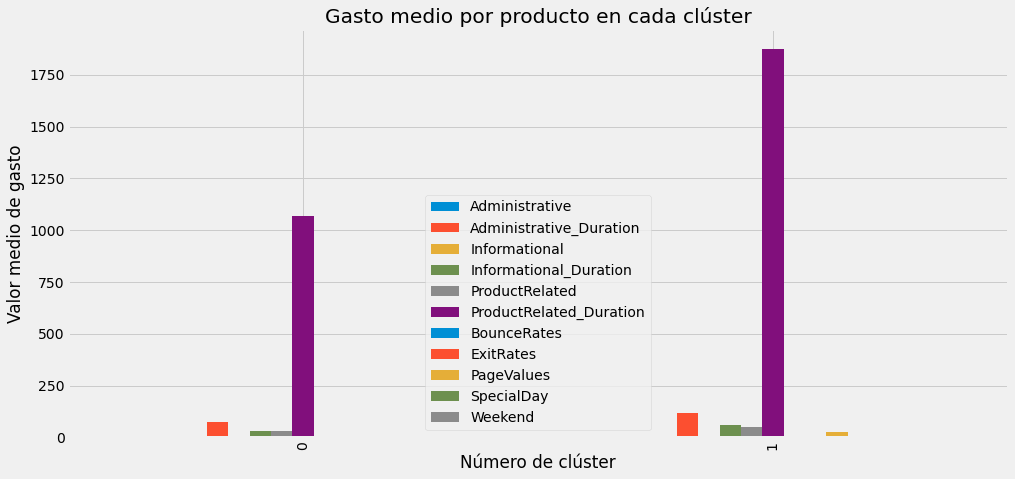

In [87]:
final_plot= XY.drop(columns= ['OperatingSystems', 'Browser', 'Region', 'TrafficType'])
final_plot.groupby('Revenue').mean().plot(kind='bar', figsize=(15,7))
plt.title('Gasto medio por producto en cada clúster')
plt.xlabel(u'Número de clúster')
_ = plt.ylabel('Valor medio de gasto')